In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor



In [2]:
df_crop=pd.read_csv('/content/Unprocessed Data.csv')

In [3]:
df_crop.shape

(756, 11)

In [4]:
print(df_crop)

       State  Year  Nitrogen (%)  Nitrogen (Pounds/Acre)  Phosphorous (%)  \
0    Alabama  1964          99.0                    72.0            100.0   
1    Alabama  1965         100.0                    81.0            100.0   
2    Alabama  1966         100.0                    83.0            100.0   
3    Alabama  1967         100.0                    78.0            100.0   
4    Alabama  1968         100.0                    71.0             99.0   
..       ...   ...           ...                     ...              ...   
751    Texas  2013           NaN                     NaN              NaN   
752    Texas  2014           NaN                     NaN              NaN   
753    Texas  2015          66.0                    65.0             46.0   
754    Texas  2016           NaN                     NaN              NaN   
755    Texas  2017          68.0                    77.0             52.0   

     Phosphorous (Pounds/Acre)  Potash (%)  Potash (Pounds/Acre)  \
0      


**DATA** **PREPROCESSING** -1

we will replace NaN value with any one of the central tendencies,i.    e,                                                       
1)Mean                                                              
2)Median                                                                   
3)Mode




In [5]:
df_crop.isna().sum()

State                                   0
Year                                    0
Nitrogen (%)                          288
Nitrogen (Pounds/Acre)                288
Phosphorous (%)                       288
Phosphorous (Pounds/Acre)             288
Potash (%)                            294
Potash (Pounds/Acre)                  298
Area Planted (acres)                  126
Harvested Area (acres)                126
Lint Yield (Pounds/Harvested Acre)    126
dtype: int64

Checking distribution plot of a column


<ipython-input-6-260173c697f3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_crop['Nitrogen (%)'])


<Axes: xlabel='Nitrogen (%)', ylabel='Density'>

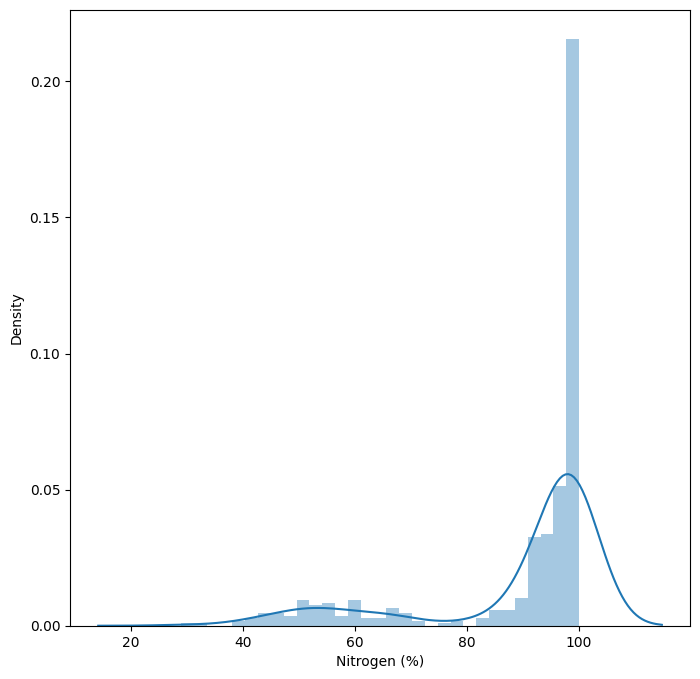

In [6]:
fig, ax=plt.subplots(figsize=(8,8))
sns.distplot(df_crop['Nitrogen (%)'])

As there are some outliers in the distribution ans the distribution plot is skew therefore we will not choose to replace null values with mean, we will choose median

calculating median for each attribute for each state


In [7]:
df_crop.groupby('State').median()

,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
State,,,,,,,,,,
Alabama,1990.5,100.0,81.0,94.0,63.0,95.0,73.0,400.0,385.0,655.0
Arizona,1990.5,94.0,142.0,45.0,62.0,4.0,20.0,270.0,269.0,1255.0
Arkansas,1990.5,97.0,75.0,72.0,41.0,76.0,58.0,700.0,675.0,793.0
California,1990.5,94.5,128.5,36.0,64.0,8.0,48.0,880.0,875.0,1254.0
Georgia,1990.5,100.0,90.5,98.0,59.0,99.0,89.5,1030.0,995.0,719.0
Louisiana,1990.5,98.0,76.5,62.5,47.0,64.0,55.0,570.0,560.0,717.0
Mississippi,1990.5,99.0,103.0,44.0,54.0,56.0,65.0,1090.0,1050.0,806.0
Missouri,1990.5,98.5,56.5,86.5,45.5,93.5,62.0,306.0,303.0,737.0
New Mexico,1990.5,59.0,67.0,44.0,60.0,9.0,18.0,66.0,55.0,724.0


Now replacing NaN values in every column with its column median

In [8]:
df_crop=df_crop.fillna(df_crop.groupby('State').transform('median'))

In [9]:
print(df_crop)

       State  Year  Nitrogen (%)  Nitrogen (Pounds/Acre)  Phosphorous (%)  \
0    Alabama  1964          99.0                    72.0            100.0   
1    Alabama  1965         100.0                    81.0            100.0   
2    Alabama  1966         100.0                    83.0            100.0   
3    Alabama  1967         100.0                    78.0            100.0   
4    Alabama  1968         100.0                    71.0             99.0   
..       ...   ...           ...                     ...              ...   
751    Texas  2013          56.0                    57.0             45.0   
752    Texas  2014          56.0                    57.0             45.0   
753    Texas  2015          66.0                    65.0             46.0   
754    Texas  2016          56.0                    57.0             45.0   
755    Texas  2017          68.0                    77.0             52.0   

     Phosphorous (Pounds/Acre)  Potash (%)  Potash (Pounds/Acre)  \
0      

Checking for NaN values again

In [10]:
df_crop.isna().sum()

State                                 0
Year                                  0
Nitrogen (%)                          0
Nitrogen (Pounds/Acre)                0
Phosphorous (%)                       0
Phosphorous (Pounds/Acre)             0
Potash (%)                            0
Potash (Pounds/Acre)                  0
Area Planted (acres)                  0
Harvested Area (acres)                0
Lint Yield (Pounds/Harvested Acre)    0
dtype: int64

In [11]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               756 non-null    object 
 1   Year                                756 non-null    int64  
 2   Nitrogen (%)                        756 non-null    float64
 3   Nitrogen (Pounds/Acre)              756 non-null    float64
 4   Phosphorous (%)                     756 non-null    float64
 5   Phosphorous (Pounds/Acre)           756 non-null    float64
 6   Potash (%)                          756 non-null    float64
 7   Potash (Pounds/Acre)                756 non-null    float64
 8   Area Planted (acres)                756 non-null    float64
 9   Harvested Area (acres)              756 non-null    float64
 10  Lint Yield (Pounds/Harvested Acre)  756 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usa

Now the dataset is complete as NaN values are replaced.


**Plotting pair plot for each column with other column to identify the relation of data of every column text**

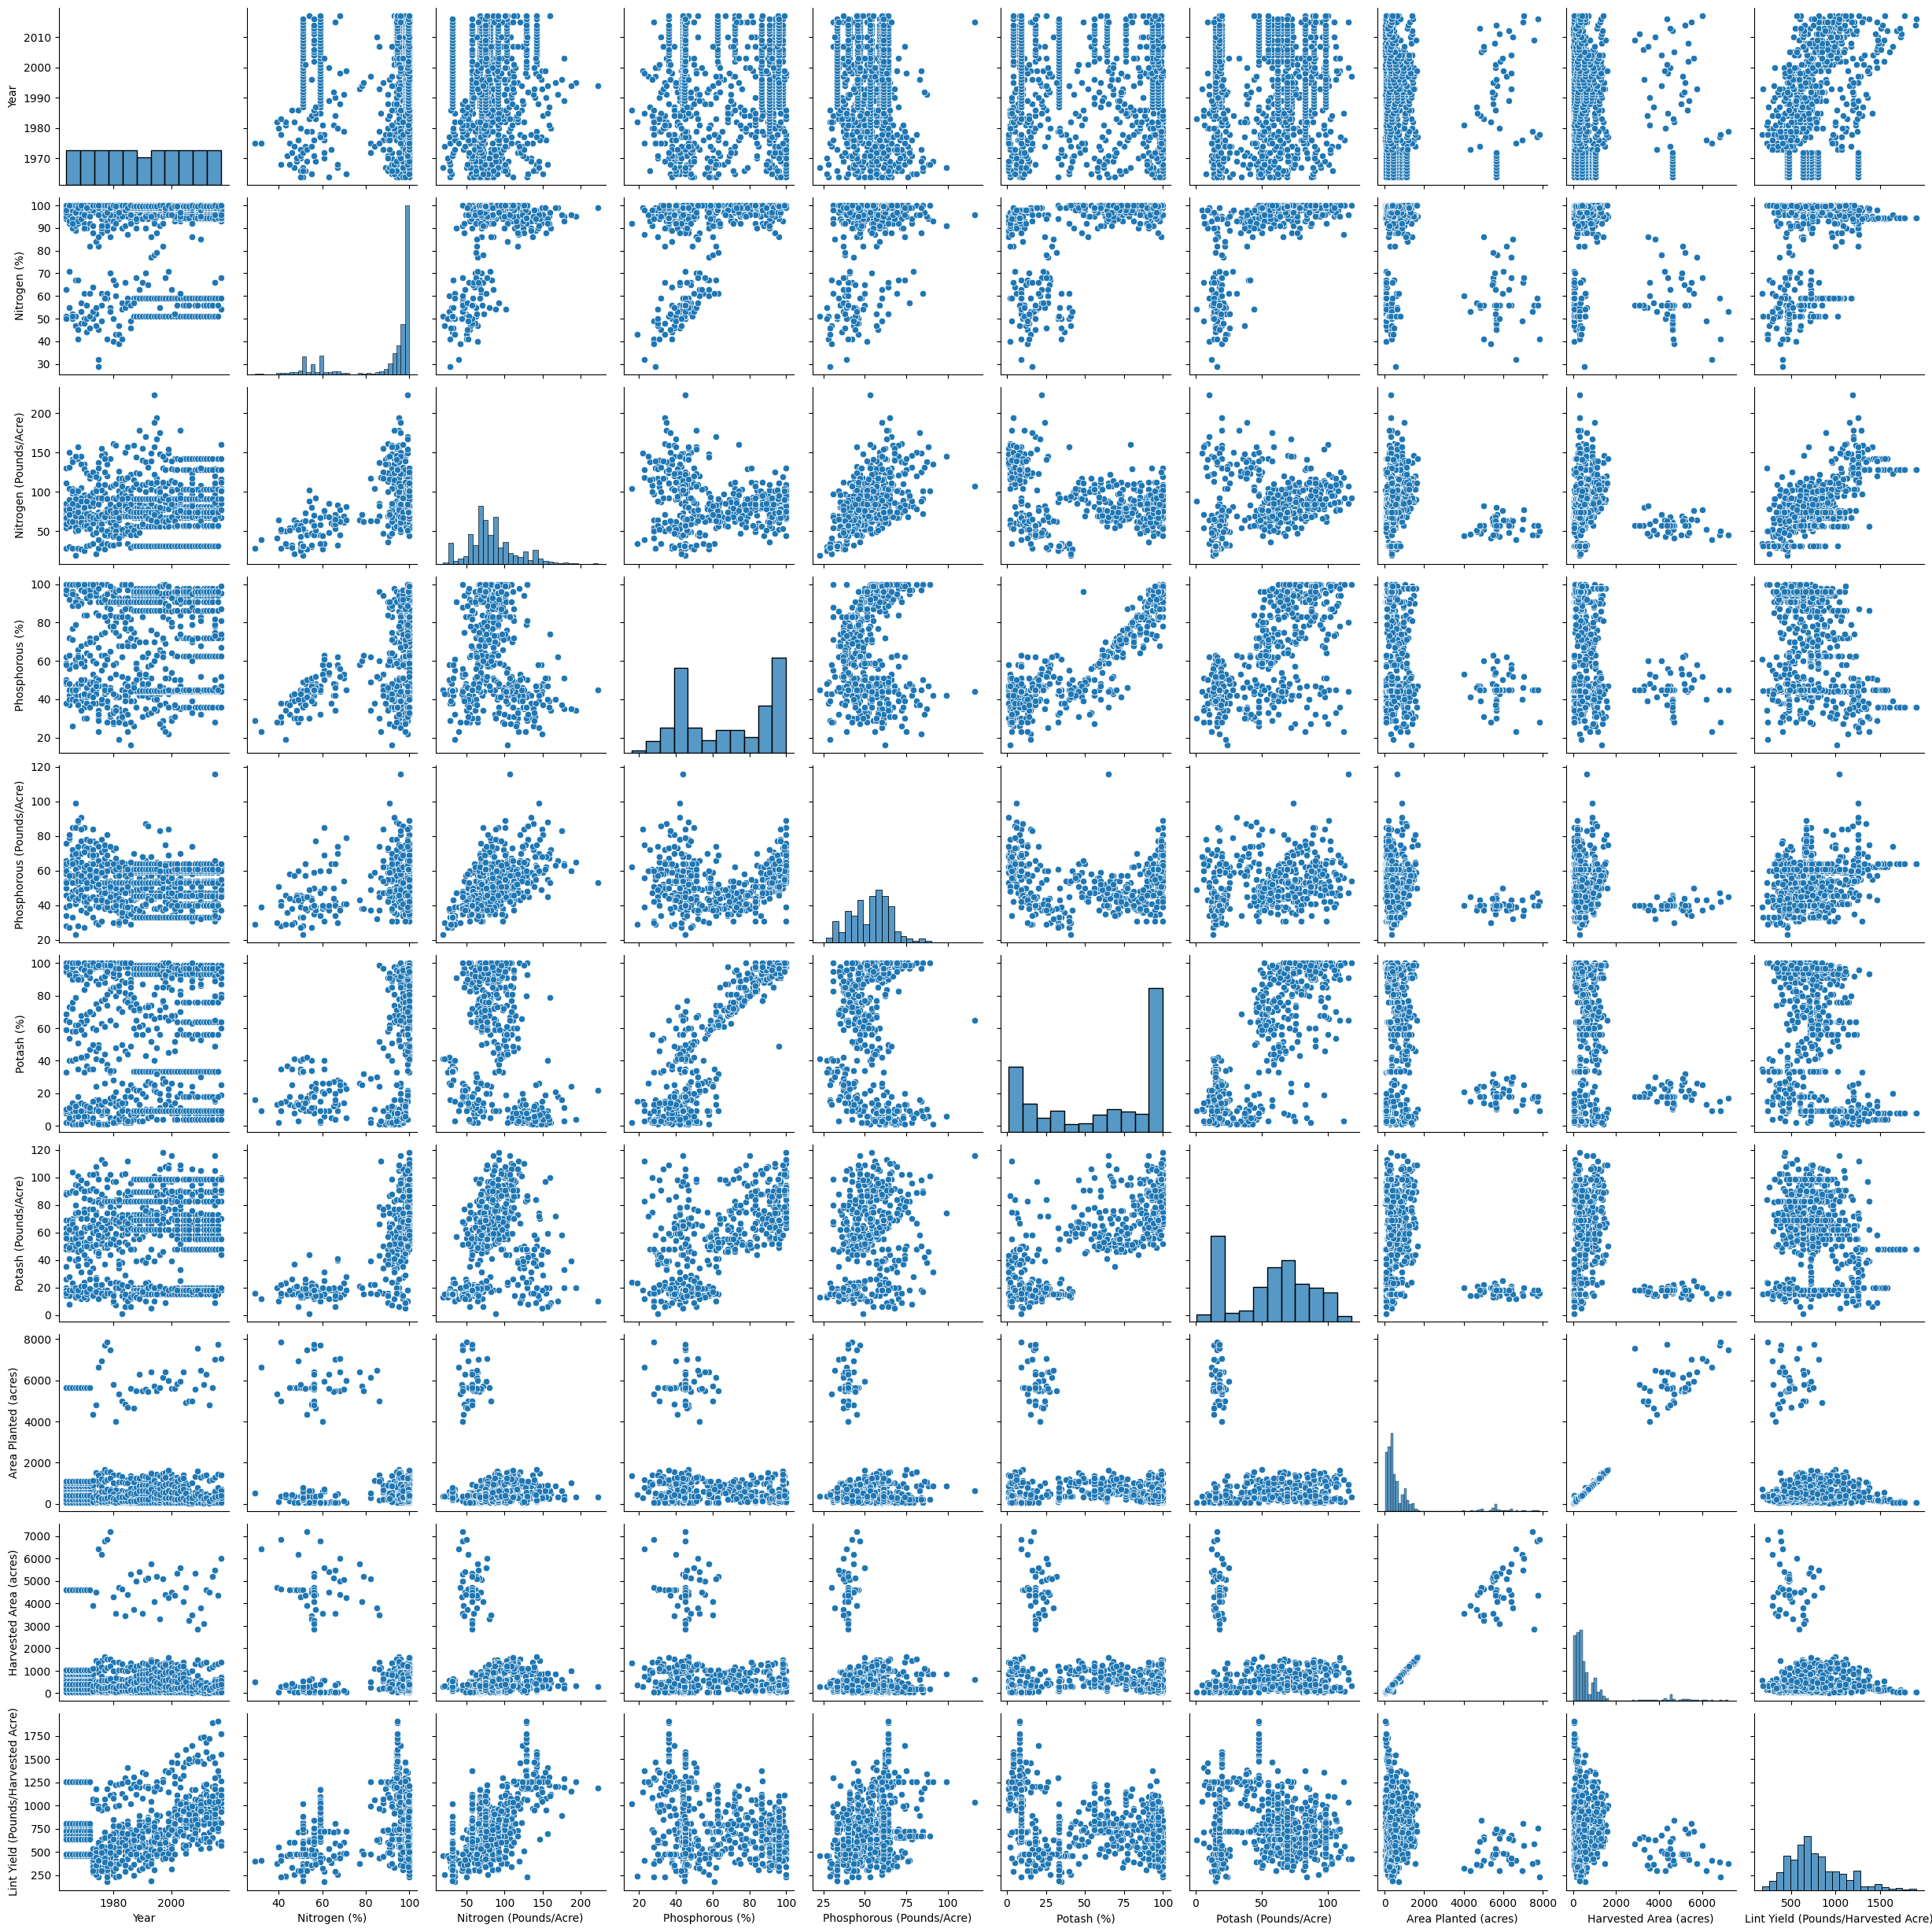

In [12]:
sns.pairplot(df_crop)

Getting different unique states

In [13]:
df_crop['State'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Georgia',
       'Louisiana', 'Mississippi', 'Missouri', 'New Mexico',
       'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee',
       'Texas'], dtype=object)

Now we will map these states to a particular value and replace with it

In [14]:
mapping=({'Alabama':1,'Arizona':2,'Arkansas':3,'California':4,'Georgia':5,'Louisiana':6,'Mississippi':7,'Missouri':8,'New Mexico':9,'North Carolina':10,
          'Oklahoma':11,'South Carolina':12,'Tennessee':13,'Texas':14})
df_crop=df_crop.replace({'State':mapping})

In [15]:
print(df_crop)

     State  Year  Nitrogen (%)  Nitrogen (Pounds/Acre)  Phosphorous (%)  \
0        1  1964          99.0                    72.0            100.0   
1        1  1965         100.0                    81.0            100.0   
2        1  1966         100.0                    83.0            100.0   
3        1  1967         100.0                    78.0            100.0   
4        1  1968         100.0                    71.0             99.0   
..     ...   ...           ...                     ...              ...   
751     14  2013          56.0                    57.0             45.0   
752     14  2014          56.0                    57.0             45.0   
753     14  2015          66.0                    65.0             46.0   
754     14  2016          56.0                    57.0             45.0   
755     14  2017          68.0                    77.0             52.0   

     Phosphorous (Pounds/Acre)  Potash (%)  Potash (Pounds/Acre)  \
0                         62.0 

**Now the dataset is fully complete as there is no NaN value present and all the states are converted to a numerical value. Now we will seperate the yield from the data as its the value which has to be predicted**


In [16]:
x=df_crop.drop('Lint Yield (Pounds/Harvested Acre)',axis=1)
y=df_crop['Lint Yield (Pounds/Harvested Acre)']
print(x)


     State  Year  Nitrogen (%)  Nitrogen (Pounds/Acre)  Phosphorous (%)  \
0        1  1964          99.0                    72.0            100.0   
1        1  1965         100.0                    81.0            100.0   
2        1  1966         100.0                    83.0            100.0   
3        1  1967         100.0                    78.0            100.0   
4        1  1968         100.0                    71.0             99.0   
..     ...   ...           ...                     ...              ...   
751     14  2013          56.0                    57.0             45.0   
752     14  2014          56.0                    57.0             45.0   
753     14  2015          66.0                    65.0             46.0   
754     14  2016          56.0                    57.0             45.0   
755     14  2017          68.0                    77.0             52.0   

     Phosphorous (Pounds/Acre)  Potash (%)  Potash (Pounds/Acre)  \
0                         62.0 

In [17]:
print(y)

0      655.0
1      655.0
2      655.0
3      655.0
4      655.0
       ...  
751    610.0
752    748.0
753    809.0
754    756.0
755    568.0
Name: Lint Yield (Pounds/Harvested Acre), Length: 756, dtype: float64


**Getting pearson correlation of all the independent variable**

In [18]:
cor1, _ = pearsonr(df_crop['State'], df_crop['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_crop['Year'], df_crop['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_crop['Nitrogen (%)'], df_crop['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_crop['Nitrogen (Pounds/Acre)'], df_crop['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_crop['Phosphorous (%)'], df_crop['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_crop['Phosphorous (Pounds/Acre)'], df_crop['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_crop['Potash (%)'], df_crop['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_crop['Potash (Pounds/Acre)'], df_crop['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_crop['Area Planted (acres)'], df_crop['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)

cor1, _ = pearsonr(df_crop['Harvested Area (acres)'], df_crop['Lint Yield (Pounds/Harvested Acre)'])
print('Pearsons correlation: %.3f' % cor1)


Pearsons correlation: -0.467
Pearsons correlation: 0.405
Pearsons correlation: 0.270
Pearsons correlation: 0.653
Pearsons correlation: -0.309
Pearsons correlation: 0.296
Pearsons correlation: -0.350
Pearsons correlation: -0.091
Pearsons correlation: -0.232
Pearsons correlation: -0.225


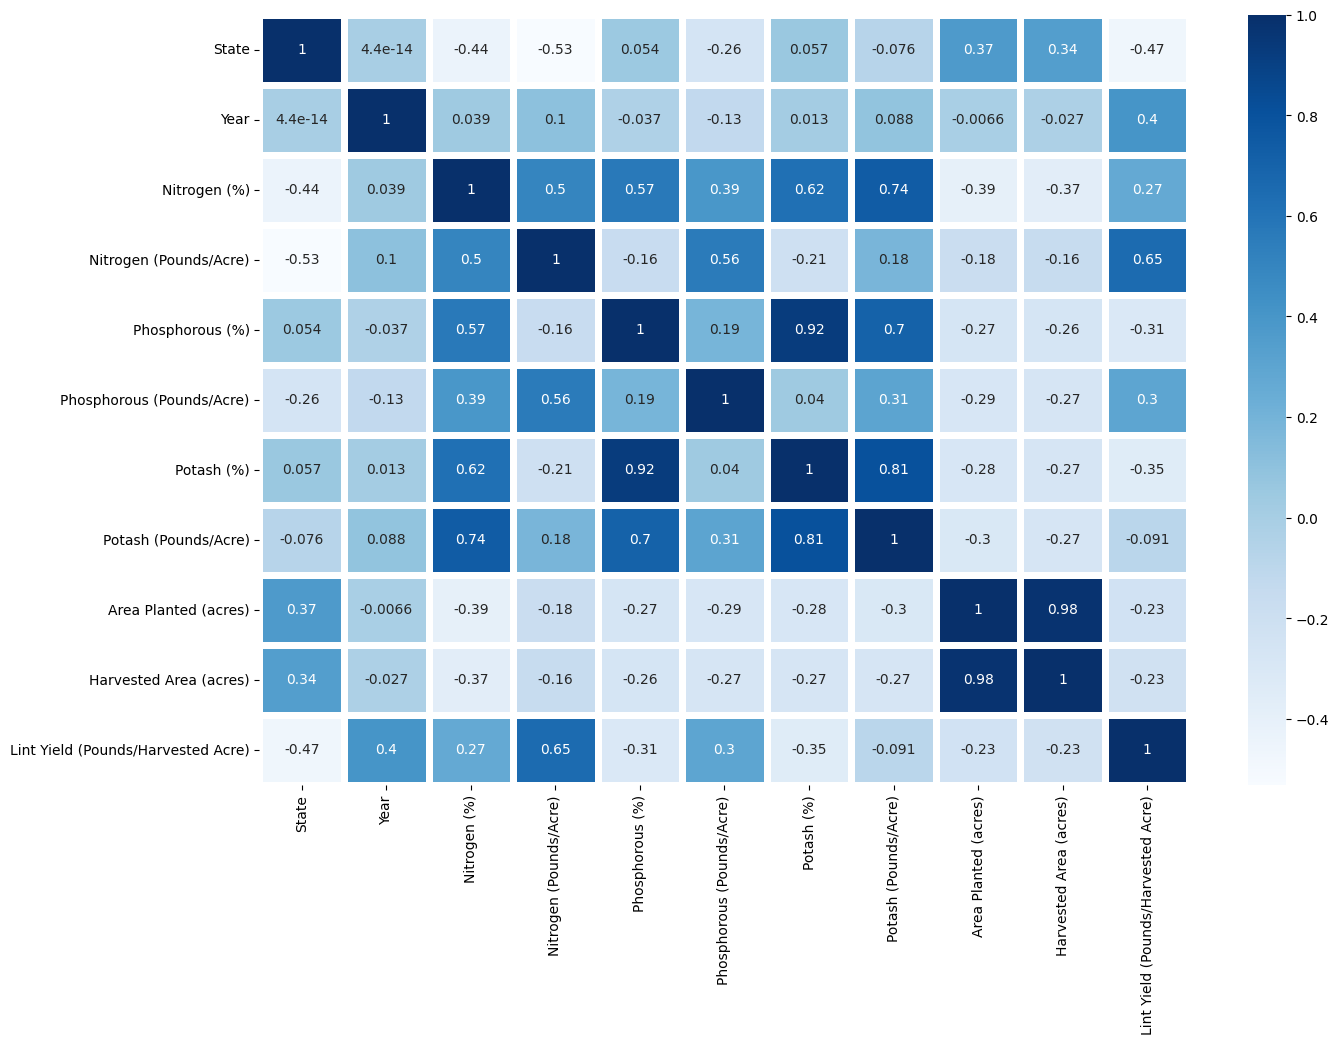

In [19]:
#create a correlation heatmap
sns.heatmap(df_crop.corr(),annot=True,cmap='Blues',linewidth=5)
fig=plt.gcf() #method to make heatmap
fig.set_size_inches(15,10)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) #80% for Training and 20% for Testing
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(604, 10) (152, 10) (604,) (152,)


In [21]:
from sklearn import ensemble
yield_predict = ensemble.GradientBoostingRegressor()

In [22]:
yield_predict.fit(x_train, y_train)

GradientBoostingRegressor()

In [23]:
yield_predict_test=yield_predict.predict(x_test)
yield_predict_train=yield_predict.predict(x_train)
pd.DataFrame({'actual unseen data':y_train,'predicted unseen data':yield_predict_train})

,actual unseen data,predicted unseen data
524,900.0,798.755973
747,589.0,656.572304
58,1255.0,1266.976416
67,1069.0,1108.324597
355,901.0,802.385203
...,...,...
96,1462.0,1486.605313
246,747.0,655.124938
648,638.0,644.642505
657,339.0,396.377988


In [24]:
scores = cross_val_score(yield_predict, x_test, y_test, cv=5)

In [25]:
print(scores)

[0.69458097 0.73115033 0.69188785 0.76955119 0.64726218]


In [26]:
predictions = cross_val_predict(yield_predict, x_test, y_test, cv=5)
accuracy = metrics.r2_score(y_test, predictions)

In [27]:
print(accuracy)

0.7211022015316916


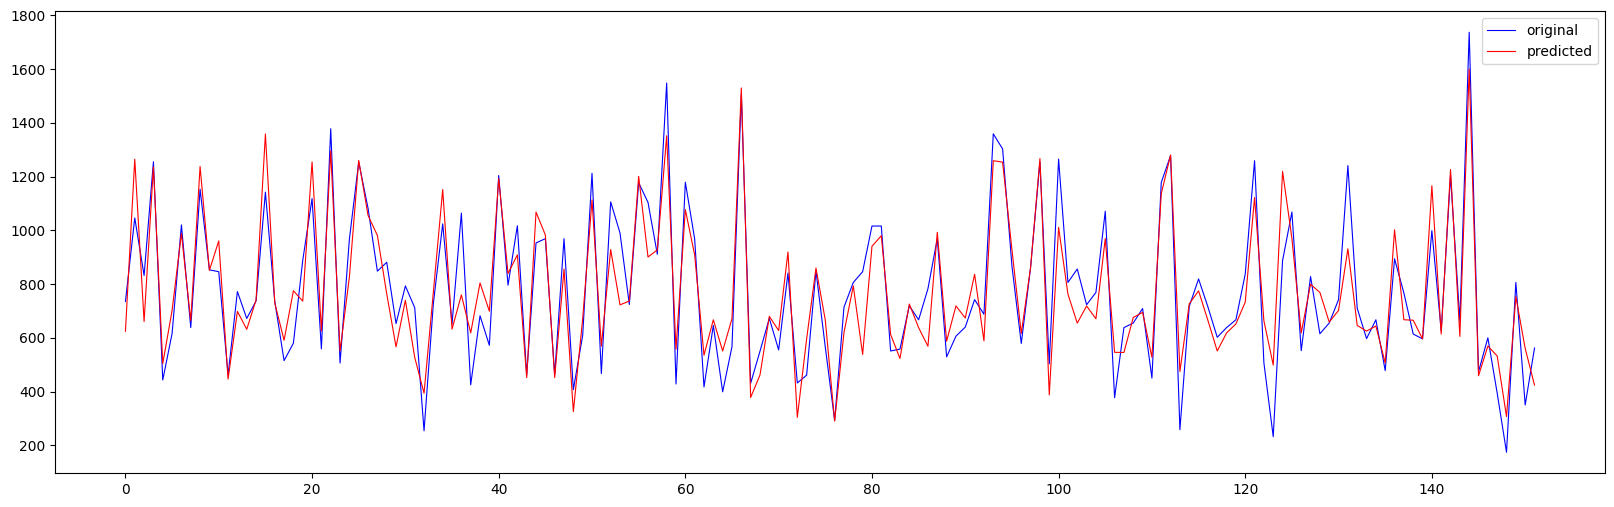

In [28]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,6))
plt.plot(x_ax, y_test, lw=0.8, color="blue", label="original")
plt.plot(x_ax, yield_predict_test, lw=0.8,color="red", label="predicted")
plt.legend()
plt.show()

In [29]:
print('MAE= ',metrics.mean_absolute_error(y_test,yield_predict_test))
print('MSE= ',metrics.mean_squared_error(y_test,yield_predict_test))
print('R2 value= ',yield_predict.score(x_test,y_test))
print('Adjusted R2 value= ',1 - (1 - (yield_predict.score(x_test,y_test))) * ((756 - 1)/(756-10-1)))
print('RMSE (train)= ',np.sqrt(mean_squared_error(y_train,yield_predict_train)))
print('RMSE (test)= ',np.sqrt(mean_squared_error(y_test,yield_predict_test)))

MAE=  87.66311940722618
MSE=  13069.81969093042
R2 value=  0.8427247047896811
Adjusted R2 value=  0.8406136270016231
RMSE (train)=  72.1861568694913
RMSE (test)=  114.32331210619478


# Model Implementation using Random Forest **Regression**

In [30]:
from sklearn.ensemble import RandomForestRegressor
randomforest=RandomForestRegressor(n_estimators=100)
randomforest.fit(x_train, y_train)

RandomForestRegressor()

In [31]:
randomforest_test=randomforest.predict(x_test)
randomforest_train=randomforest.predict(x_train)
pd.DataFrame({'actual unseen data':y_train,'predicted unseen data':randomforest_train})

,actual unseen data,predicted unseen data
524,900.0,839.67
747,589.0,621.19
58,1255.0,1253.50
67,1069.0,1104.64
355,901.0,845.80
...,...,...
96,1462.0,1471.25
246,747.0,712.01
648,638.0,616.45
657,339.0,412.96


In [32]:
scores_rf = cross_val_score(randomforest, x_test, y_test, cv=5)

In [33]:
print(scores_rf)

[0.75651223 0.68258414 0.73411265 0.75757813 0.44422543]


In [34]:
predictions_rf = cross_val_predict(randomforest, x_test, y_test, cv=5)
accuracy_rf = metrics.r2_score(y_test, predictions_rf)

In [35]:
print(accuracy_rf)

0.669206289042533


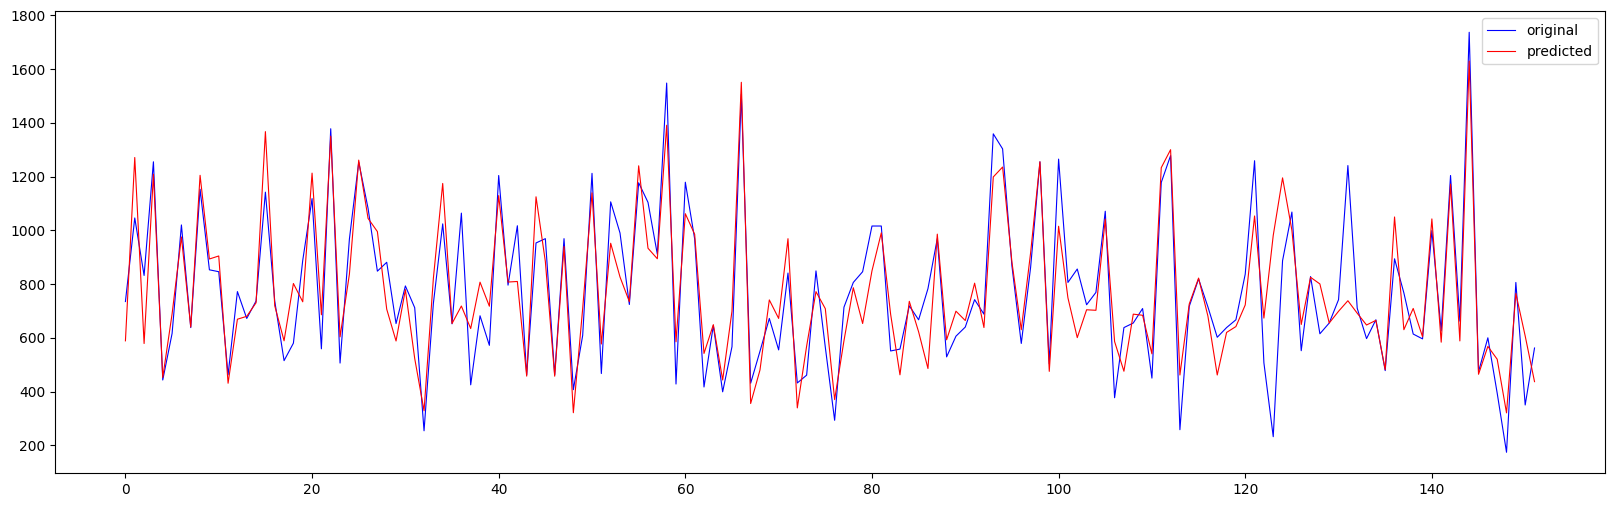

In [36]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,6))
plt.plot(x_ax, y_test, lw=0.8, color="blue", label="original")
plt.plot(x_ax, randomforest_test, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [37]:
print('MAE= ',metrics.mean_absolute_error(y_test,randomforest_test))
print('MSE= ',metrics.mean_squared_error(y_test,randomforest_test))
print('R2 value= ',randomforest.score(x_test,y_test))
print('Adjusted R2 value= ',1 - (1 - (randomforest.score(x_test,y_test))) * ((756 - 1)/(756-10-1)))
print('RMSE (train)= ',np.sqrt(mean_squared_error(y_train,randomforest_train)))
print('RMSE (test)= ',np.sqrt(mean_squared_error(y_test,randomforest_test)))

MAE=  97.3825
MSE=  18832.524634210524
R2 value=  0.7733793624210121
Adjusted R2 value=  0.7703374746682741
RMSE (train)=  46.09828838708161
RMSE (test)=  137.23164589193894


In [38]:
x_train = x_train.drop(['Year', 'State'], axis=1)
x_test = x_test.drop(['Year', 'State'], axis=1)

In [39]:
x_train.head()

,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres)
524,99.0,69.5,91.0,53.0,98.0,83.0,730.0,725.0
747,56.0,57.0,45.0,40.0,18.0,18.0,7550.0,2850.0
58,95.0,142.0,46.0,68.0,1.0,36.0,270.0,269.0
67,92.0,148.0,58.0,59.0,1.0,37.0,580.0,575.0
355,100.0,112.0,40.0,54.0,60.0,86.0,985.0,970.0


In [62]:
y_train.describe()

count     604.000000
mean      767.521523
std       302.747646
min       187.000000
25%       557.000000
50%       719.000000
75%       927.500000
max      1910.000000
Name: Lint Yield (Pounds/Harvested Acre), dtype: float64

In [63]:
1910-187

1723

In [40]:
y_train.head(10)

524     900.0
747     589.0
58     1255.0
67     1069.0
355     901.0
329     806.0
141     714.0
721     404.0
343     764.0
411     601.0
Name: Lint Yield (Pounds/Harvested Acre), dtype: float64

In [41]:
import numpy as np

X_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

In [42]:
X_train_np[0]

array([ 99. ,  69.5,  91. ,  53. ,  98. ,  83. , 730. , 725. ])

In [69]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(8,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.output_shape

(None, 1)

In [70]:
adam = tf.keras.optimizers.Adam(
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=0.1,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam'
)

In [71]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=20,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    '/content',
    monitor = 'val_loss',
    verbose = 0,
    save_best_only = False,
    save_weights_only = False,
    mode = 'auto',
    save_freq='epoch',
    options=None,
    initial_value_threshold=None
)

In [72]:
model.compile(optimizer='adam', loss='mae')

In [73]:
model.fit(
    X_train_np,
    y_train_np,
    epochs=10000,
    validation_data=[x_test, y_test],
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/10000
19/19 [==============================] - 5s 85ms/step - loss: 763.6341 - val_loss: 648.8557
Epoch 2/10000
19/19 [==============================] - 1s 77ms/step - loss: 600.7235 - val_loss: 2347.4790
Epoch 3/10000
19/19 [==============================] - 1s 76ms/step - loss: 290.9366 - val_loss: 1655.0491
Epoch 4/10000
19/19 [==============================] - 1s 74ms/step - loss: 208.0279 - val_loss: 1157.5771
Epoch 5/10000
19/19 [==============================] - 1s 78ms/step - loss: 190.3057 - val_loss: 811.4901
Epoch 6/10000
19/19 [==============================] - 1s 74ms/step - loss: 188.2664 - val_loss: 494.2256
Epoch 7/10000
19/19 [==============================] - 3s 141ms/step - loss: 179.5388 - val_loss: 537.5733
Epoch 8/10000
19/19 [==============================] - 2s 111ms/step - loss: 175.6526 - val_loss: 367.6329
Epoch 9/10000
19/19 [==============================] - 2s 88ms/step - loss: 170.2331 - val_loss: 309.9615
Epoch 10/10000
19/19 [===================

In [74]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


# Standardize the data (important for SVR)
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Create an SVR model
svr_model = SVR(kernel='rbf')  # You can choose different kernels and adjust other hyperparameters

# Fit the model
svr_model.fit(X_train, y_train)

# Make predictions
y_pred = svr_model.predict(X_test)

# Evaluate using Mean Squared Error
mse = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mse}')


Mean Absolute Error: 214.39322875784293
